In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Stress-Lysis.csv')
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [3]:
df.shape

(2001, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [5]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [6]:
df.corr()

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step count,0.870486,0.870486,1.000000,0.832623
Stress Level,0.936036,0.936036,0.832623,1.000000


In [7]:
df.cov()

,Humidity,Temperature,Step count,Stress Level
Humidity,33.383350,33.383350,292.632460,4.170275
Temperature,33.383350,33.383350,292.632460,4.170275
Step count,292.632460,292.632460,3385.255488,37.355221
Stress Level,4.170275,4.170275,37.355221,0.594585


In [8]:
df.var()

Humidity          33.383350
Temperature       33.383350
Step count      3385.255488
Stress Level       0.594585
dtype: float64

In [9]:
df.dtypes

Humidity        float64
Temperature     float64
Step count        int64
Stress Level      int64
dtype: object

In [10]:
df.isna().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [11]:
df.columns

Index(['Humidity', 'Temperature', 'Step count', 'Stress Level'], dtype='object')

<AxesSubplot:>

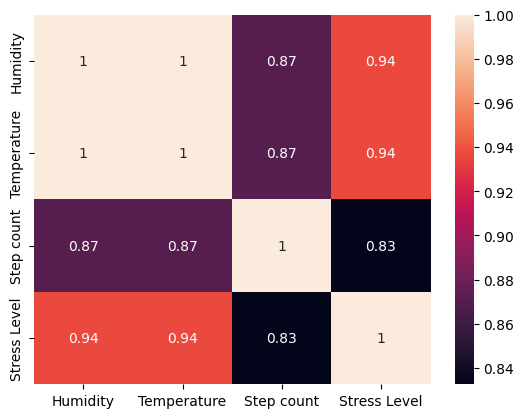

In [12]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

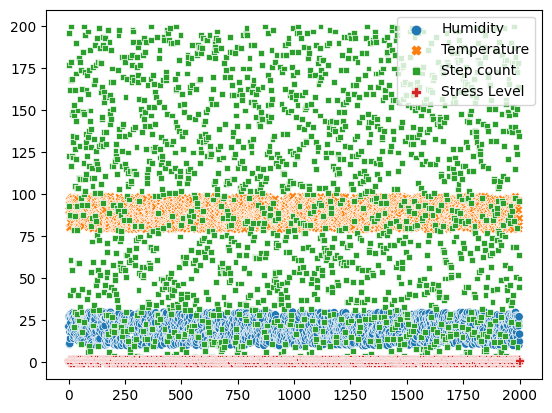

In [13]:
sns.scatterplot(data=df)

<AxesSubplot:xlabel='Humidity', ylabel='Temperature'>

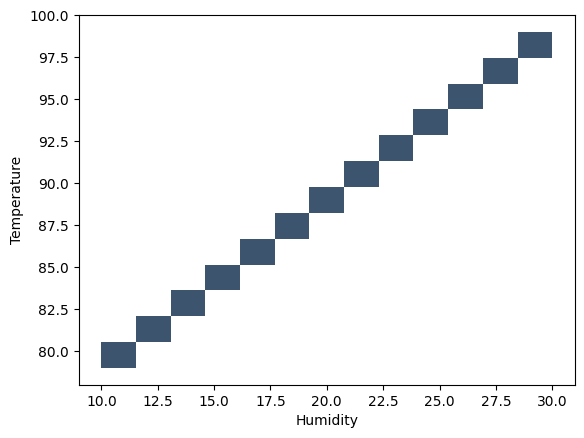

In [14]:
sns.histplot(x='Humidity',y='Temperature',data=df)

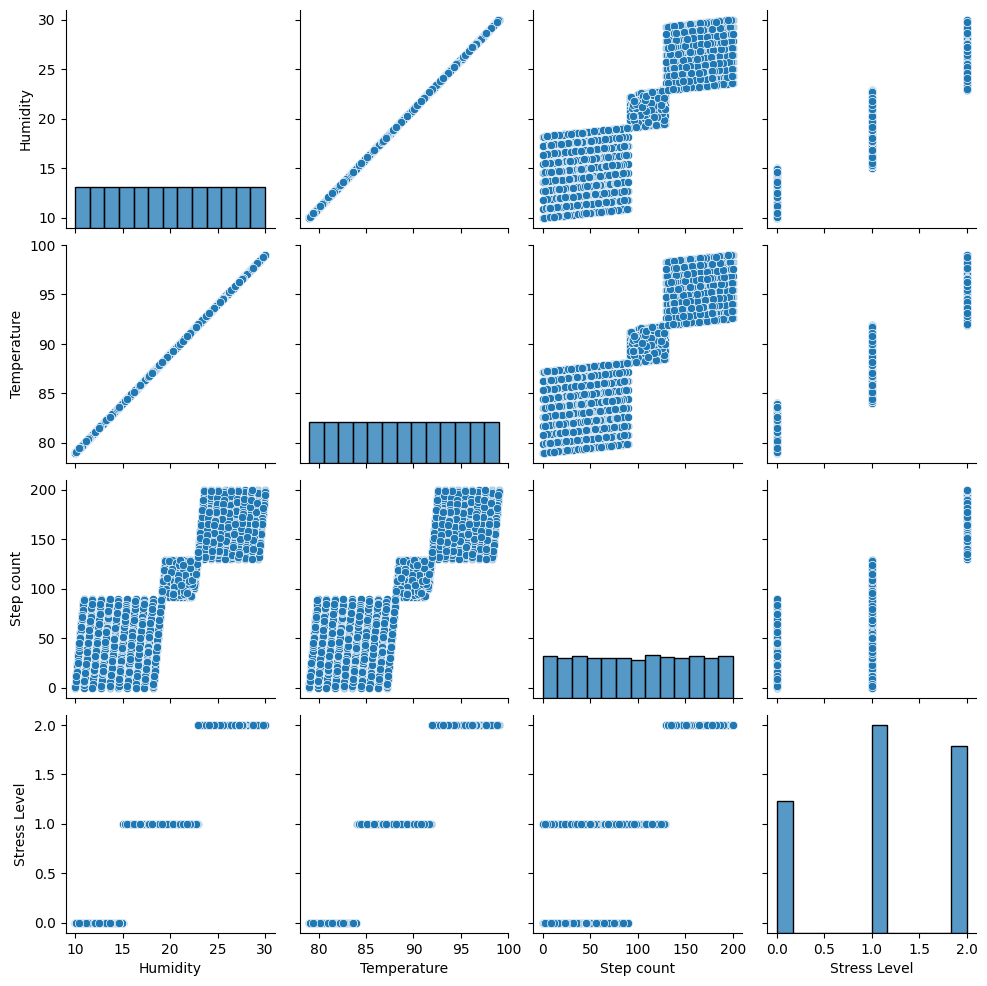

In [15]:
sns.pairplot(data=df)

In [16]:
x=df.drop('Stress Level',axis=1).values
y=df['Stress Level'].values

In [17]:
x

array([[ 21.33,  90.33, 123.  ],
       [ 21.41,  90.41,  93.  ],
       [ 27.12,  96.12, 196.  ],
       ...,
       [ 27.22,  96.22, 135.  ],
       [ 12.46,  81.46,  64.  ],
       [ 16.87,  85.87,  50.  ]])

In [18]:
y

array([1, 1, 2, ..., 2, 0, 1], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600, 3), (401, 3), (1600,), (401,))

In [21]:
# from sklearn.preprocessing import StandardScaler

# scalar=StandardScaler()

# x_train=scalar.fit_transform(x_train)
# x_test=scalar.transform(x_test)

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [37]:
model=keras.Sequential([
    keras.layers.Dense(units=128,activation='relu',name='dense_first'),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dense(units=32,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3,activation='softmax',name='dense_last')
])

In [45]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
res=model.fit(x_train, y_train, epochs=10, validation_split=0.2,batch_size=32)

Epoch 1/10
40/40 [==============================] - 3s 25ms/step - loss: 0.0433 - accuracy: 0.9875 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0838 - accuracy: 0.9703 - val_loss: 0.0928 - val_accuracy: 0.9719
Epoch 3/10
40/40 [==============================] - 0s 12ms/step - loss: 0.0437 - accuracy: 0.9828 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9906 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0264 - accuracy: 0.9891 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.9906 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 8/10
40/40 

In [46]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 4ms/step - loss: 0.0171 - accuracy: 0.9975


[0.017120134085416794, 0.9975062608718872]

In [47]:
model.evaluate(x_train,y_train)

50/50 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 0.9975


[0.01822531409561634, 0.9975000023841858]

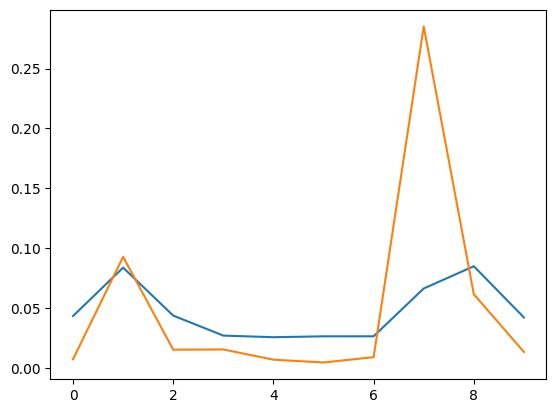

In [48]:
plt.plot(res.history['loss'],label='loss')
plt.plot(res.history['val_loss'],label='val_loss')

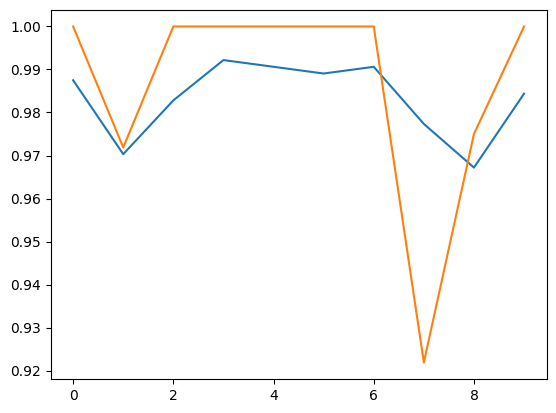

In [49]:
plt.plot(res.history['accuracy'],label='Accuracy')
plt.plot(res.history['val_accuracy'],label='Val_accuracy')